In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from montecarlo.montecarlo import Die, Game, Analyzer

## Scenario #1 Two-headed coin

In [44]:
# Create a fair coin
fair_coin = Die(['H', 'T'])

# Create an unfair coin
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)

# Play a game of 1000 flips with all fair dice
fair_game = Game([fair_coin])
fair_analyzer = Analyzer([fair_game])
fair_jackpot_frequency = fair_analyzer.compute_jackpot(1000) / 1000

# Play a game of 1000 flips with two unfair dice and one fair die
unfair_game = Game([unfair_coin, unfair_coin, fair_coin])
unfair_analyzer = Analyzer([unfair_game])
unfair_jackpot_frequency = unfair_analyzer.compute_jackpot(1000) / 1000

# Display results
print("Relative Frequency of Jackpots in Fair Game:", fair_jackpot_frequency)
print("Relative Frequency of Jackpots in Unfair Game:", unfair_jackpot_frequency)

Relative Frequency of Jackpots in Fair Game: 0.0
Relative Frequency of Jackpots in Unfair Game: 0.0


## Scenario #2: 6-sided die

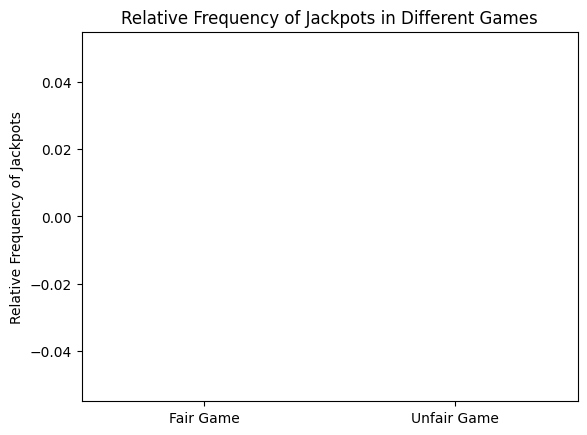

ValueError: cannot insert 0, already exists

In [38]:
# Create fair die
fair_die = Die([1, 2, 3, 4, 5, 6])

# Create unfair dice
unfair_die_type1 = Die([1, 2, 3, 4, 5, 6])
unfair_die_type1.change_weight(6, 5)

unfair_die_type2 = Die([1, 2, 3, 4, 5, 6])
unfair_die_type2.change_weight(1, 5)

# Create a game with 5 fair dice for 10000 rolls
fair_game = Game([fair_die] * 5)
fair_jackpot_analyzer = Analyzer([fair_game])
fair_jackpot_frequency = fair_jackpot_analyzer.compute_jackpot(10000) / 10000

# Create a game with 2 unfair dice of type 1, 1 unfair die of type 2, and 2 fair dice for 10000 rolls
unfair_game = Game([unfair_die_type1, unfair_die_type1, unfair_die_type2, fair_die, fair_die])
unfair_jackpot_analyzer = Analyzer([unfair_game])
unfair_jackpot_frequency = unfair_jackpot_analyzer.compute_jackpot(10000) / 10000

# Display results
games = ['Fair Game', 'Unfair Game']
jackpot_frequencies = [fair_jackpot_frequency, unfair_jackpot_frequency]

plt.bar(games, jackpot_frequencies)
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Relative Frequency of Jackpots in Different Games')
plt.show()

# Compute 10 most frequent combinations of faces for each game and plot as bar charts
fair_combos = fair_jackpot_analyzer.compute_combo(10000)
unfair_combos = unfair_jackpot_analyzer.compute_combo(10000)

for combo_df in fair_combos:
    combo_df[:10].plot(kind='bar', x='face_rolled', y='count', title='Fair Dice Combo')

for combo_df in unfair_combos:
    combo_df[:10].plot(kind='bar', x='face_rolled', y='count', title='Unfair Dice Combo')

## Scenario 3: Combo of letters to form words

In [40]:
# Define letter frequencies 
letter_frequencies = {
    'a': 0.08167, 'b': 0.01492, 'c': 0.02782, 'd': 0.04253, 'e': 0.12702,
    'f': 0.02228, 'g': 0.02015, 'h': 0.06094, 'i': 0.06966, 'j': 0.00153,
    'k': 0.00772, 'l': 0.04025, 'm': 0.02406, 'n': 0.06749, 'o': 0.07507,
    'p': 0.01929, 'q': 0.00095, 'r': 0.05987, 's': 0.06327, 't': 0.09056,
    'u': 0.02758, 'v': 0.00978, 'w': 0.02360, 'x': 0.00150, 'y': 0.01974, 'z': 0.00074
}

# Create a die of letters based on their frequencies
letter_die = Die(list(letter_frequencies.keys()))
for letter, freq in letter_frequencies.items():
    letter_die.change_weight(letter, freq)

# Create a game with 5 letter dice for 1000 rolls
letter_game = Game([letter_die] * 5)
letter_analyzer = Analyzer([letter_game])

# Count how many combos look like actual English words
english_word_combos = 0
total_combos = 0
for _ in range(1000):
    combo_df = letter_game.play(5)
    combo_str = ''.join(combo_df['face_rolled'].astype(str))
    total_combos += 1
    
    # Check if combo looks like an English word (you need a word dictionary for this)
    if is_english_word(combo_str):
        english_word_combos += 1

# Calculate relative frequency
english_word_frequency = english_word_combos / total_combos
non_english_word_frequency = 1 - english_word_frequency

# Display results
word_frequencies = [english_word_frequency, non_english_word_frequency]
labels = ['English Words', 'Non-English Words']

plt.bar(labels, word_frequencies)
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of English-Like Words')
plt.show()

TypeError: sequence item 0: expected str instance, int found